In [2]:
# ! pip install pycaret

In [14]:
from pycaret.datasets import get_data
from pycaret import *
from pycaret.clustering import *


In [1]:
from pycaret.utils import version
version()

'3.2.0'

In [36]:
data = get_data('country-data')
data.shape

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


(167, 10)

In [37]:
print(len(data['country'].unique()))
data['country'].value_counts()

167


Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64

In [38]:
kmean_setup = setup(data,ignore_features = ['country'])

,Description,Value
0,Session id,7170
1,Original data shape,"(167, 10)"
2,Transformed data shape,"(167, 9)"
3,Ignore features,1
4,Numeric features,9
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


In [39]:
kmean = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6109,382.4678,0.6339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

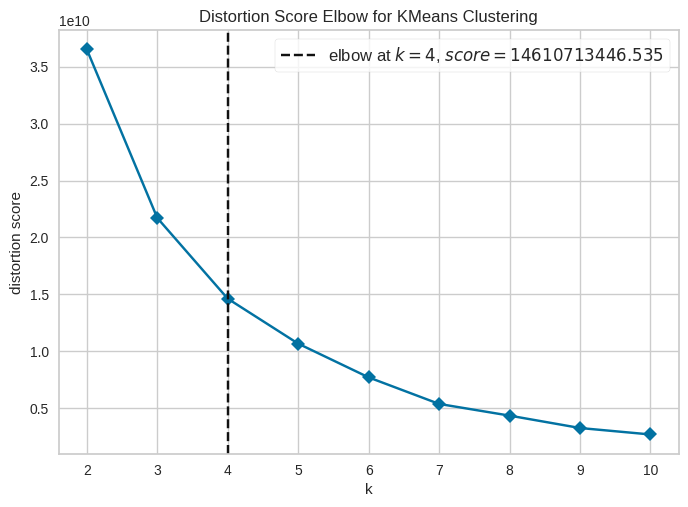

In [40]:
plot_model(kmean,plot = 'elbow')

In [102]:
kmean = create_model('kmeans',num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2286,67.9982,1.4725,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [31]:
kmean_res = assign_model(kmean)
kmean_res

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.199997,10.000000,7.58,44.900002,1610,9.440000,56.200001,5.82,553,Cluster 0
1,16.600000,28.000000,6.55,48.599998,9930,4.490000,76.300003,1.65,4090,Cluster 0
2,27.299999,38.400002,4.17,31.400000,12900,16.100000,76.500000,2.89,4460,Cluster 0
3,119.000000,62.299999,2.85,42.900002,5900,22.400000,60.099998,6.16,3530,Cluster 0
4,10.300000,45.500000,6.03,58.900002,19100,1.440000,76.800003,2.13,12200,Cluster 3
...,...,...,...,...,...,...,...,...,...,...
162,29.200001,46.599998,5.25,52.700001,2950,2.620000,63.000000,3.50,2970,Cluster 0
163,17.100000,28.500000,4.91,17.600000,16500,45.900002,75.400002,2.47,13500,Cluster 3
164,23.299999,72.000000,6.84,80.199997,4490,12.100000,73.099998,1.95,1310,Cluster 0
165,56.299999,30.000000,5.18,34.400002,4480,23.600000,67.500000,4.67,1310,Cluster 0


In [32]:
plot_model(kmean,plot = 'cluster')

In [34]:
print(plot_model(kmean,plot = 'tsne'))

None


In [98]:
def each_method(m,size,main_data):

  print(f'                 ----> No Data Processing <---- \n')
  data = main_data
  kmean_setup = setup(data,ignore_features = ['country'],verbose=False)

  for n_clust in size :
    print(f'At cluster Size {n_clust} ')
    kmean = create_model(m,num_clusters=n_clust)
  print('\n')


  print(f'                 ----> Using Normalisation <---- \n')
  data = main_data
  kmean_setup = setup(data,ignore_features = ['country'],normalize = True ,normalize_method = 'zscore',verbose=False)

  for n_clust in size :
    print(f'At cluster Size {n_clust} ')
    kmean = create_model(m,num_clusters=n_clust)
  print('\n')


  print(f'                 ----> Using Transformation <---- \n')
  data = main_data
  kmean_setup = setup(data,ignore_features = ['country'],transformation = True ,transformation_method = 'yeo-johnson',verbose=False)

  for n_clust in size :
    print(f'At cluster Size {n_clust} ')
    kmean = create_model(m,num_clusters=n_clust )
  print('\n')


  print(f'                 ----> Using PCA <---- \n')
  data = main_data
  kmean_setup = setup(data,ignore_features = ['country'],pca = True ,pca_method = 'linear',verbose=False)

  for n_clust in size :
    print(f'At cluster Size {n_clust} ')
    kmean = create_model(m,num_clusters=n_clust )
  print('\n')


  print(f'                 ----> Using T + N <---- \n')
  data = main_data
  kmean_setup = setup(data,ignore_features = ['country'],normalize = True,normalize_method = 'zscore', transformation = True ,transformation_method = 'yeo-johnson',verbose=False)

  for n_clust in size :
    print(f'At cluster Size {n_clust} ')
    kmean = create_model(m,num_clusters=n_clust )
  print('\n')


  print(f'                 ----> Using T + N + PCA <---- \n')
  data = main_data
  kmean_setup = setup(data,ignore_features = ['country'],normalize = True ,normalize_method = 'zscore',transformation = True ,transformation_method = 'yeo-johnson' ,pca = True ,pca_method = 'linear',verbose=False)

  for n_clust in size :
    print(f'At cluster Size {n_clust} ')
    kmean = create_model(m,num_clusters=n_clust )
  print('\n')






In [ ]:
def model_pipeline(main_data , method , size):
  data = main_data
  kmean_setup = setup(data,ignore_features = ['country'],verbose=False)
  for m in method:
    print(f'                                            ###### Using {m} Method  ###### \n')
    each_method(m,size,main_data)

<h1> K-Means

In [101]:
method = ['kmeans']
size = [3,4,5]
model_pipeline(data,method,size)

                                            ###### Using kmeans Method  ###### 

                 ----> No Data Processing <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7004,361.6481,0.7208,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5928,378.2426,0.6457,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5735,405.9522,0.6548,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using Normalisation <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2833,66.2348,1.2769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3021,62.2628,1.0412,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3073,57.6427,0.8611,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using Transformation <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5624,561.7137,0.5435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6102,812.3671,0.4618,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5746,862.3491,0.5145,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using PCA <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7004,361.6481,0.7208,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6109,382.4678,0.6339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5735,405.9522,0.6548,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using T + N <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2458,83.4876,1.3837,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2224,68.6731,1.4153,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2258,60.8244,1.4093,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using T + N + PCA <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2475,83.4721,1.3834,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2286,67.9982,1.4725,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2195,61.5262,1.4535,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

<h1>Agglomerative Clustering

In [100]:
method = ['hclust']
size = [3,4,5]
model_pipeline(data,method,size)

                                            ###### Using hclust Method  ###### 

                 ----> No Data Processing <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5963,309.2945,0.6707,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6086,373.5443,0.6847,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6131,362.0170,0.6836,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using Normalisation <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2456,50.7162,1.2998,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2481,48.2626,1.0801,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2193,49.1484,1.3008,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using Transformation <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5395,433.6007,0.5045,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6074,798.2333,0.4590,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5634,790.0113,0.5269,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using PCA <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5963,309.2945,0.6707,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6086,373.5443,0.6847,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6131,362.0170,0.6836,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using T + N <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2217,76.6752,1.4831,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2283,61.5179,1.3379,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2068,54.4203,1.4223,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using T + N + PCA <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2217,76.6752,1.4831,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2283,61.5179,1.3379,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2068,54.4203,1.4223,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

<h1>K-Modes clustering

In [106]:
method = ['ap']
size = [3,4,5]
model_pipeline(data,method,size)

                                            ###### Using ap Method  ###### 

                 ----> No Data Processing <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5297,1064.3440,0.4710,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5297,1064.3440,0.4710,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5297,1064.3440,0.4710,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using Normalisation <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1751,38.5916,1.0072,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1751,38.5916,1.0072,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1751,38.5916,1.0072,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using Transformation <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,1159.4971,0.5247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,1159.4971,0.5247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,1159.4971,0.5247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using PCA <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5297,1064.3440,0.4710,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5297,1064.3440,0.4710,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5297,1064.3440,0.4710,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using T + N <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2024,37.2505,1.1331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2024,37.2505,1.1331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2024,37.2505,1.1331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using T + N + PCA <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2024,37.2505,1.1331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2024,37.2505,1.1331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2024,37.2505,1.1331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

<h1>Spectral Clustering

In [105]:
method = ['sc']
size = [3,4,5]
model_pipeline(data,method,size)

                                            ###### Using sc Method  ###### 

                 ----> No Data Processing <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0621,0.3464,15.4942,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3019,0.8527,7.4931,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.5289,1.0353,13.2961,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using Normalisation <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2756,36.4073,1.0541,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2725,40.6238,1.0466,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2607,33.6759,0.9787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using Transformation <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4346,1.7194,2.8723,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4148,2.6912,2.1192,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4101,2.0260,2.7318,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using PCA <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0736,0.7083,64.8180,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1968,1.4400,9.0501,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2591,0.7172,14.0150,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using T + N <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2937,56.5927,0.9832,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2418,57.4288,1.0893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2306,48.8823,1.0730,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



                 ----> Using T + N + PCA <---- 

At cluster Size 3 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2937,56.5927,0.9832,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 4 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2418,57.4288,1.0893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

At cluster Size 5 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2306,48.8823,1.0730,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]